# Module 3.3 — Worst-Case Paths
#### Background assumptions
- All paths are generated from the same fixed outcome distribution
- No strategy logic or parameter changes are involved
- Differences arise solely from randomness in sequencing

Most analyses implicitly focus on typical or average behavior.    
This module intentionally does the opposite.    

#### Purpose of this simulation 
To isolate and visualize the worst-case realizations that occur naturally within an otherwise unchanged system.

#### Common intuitive beliefs (to be examined)
- Extreme paths are rare and ignorable
- Planning around the average case is sufficient
- Worst outcomes imply something abnormal occurred

#### Objective
>To observe the paths that are statistically valid but emotionally difficult to endure.

In [101]:
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(42)


In [102]:
n_trades = 300
wins = 165
losses = n_trades - wins

outcomes = np.array([1]*wins + [-1]*losses)


In [103]:
def generate_equity_path(outcomes):
    shuffle = np.random.permutation(outcomes)
    return np.cumsum(shuffle)

def max_drawdown(equity):
    peak = equity[0]
    max_dd = 0
    for x in equity:
        if x > peak:
            peak = x
        dd = peak - x
        max_dd = max(max_dd, dd)
    return max_dd

In [104]:
n_path = 5000

paths = []
drawdowns = []

for _ in range(n_path):
    path = generate_equity_path(outcomes)
    paths.append(path)
    drawdowns.append(max_drawdown(path))

paths = np.array(paths)
drawdowns = np.array(drawdowns)


In [105]:
rank_idx = np.argsort(drawdowns)[::-1]  # worst first

sorted_paths = paths[rank_idx]
sorted_drawdowns = drawdowns[rank_idx]

In [106]:
percentiles = [1, 5, 10]
for p in percentiles:
    threshold = np.percentile(drawdowns, 100-p)
    print(f"Top {p}% worst paths → drawdown ≥ {threshold:.1f}")

Top 1% worst paths → drawdown ≥ 22.0
Top 5% worst paths → drawdown ≥ 18.0
Top 10% worst paths → drawdown ≥ 16.0


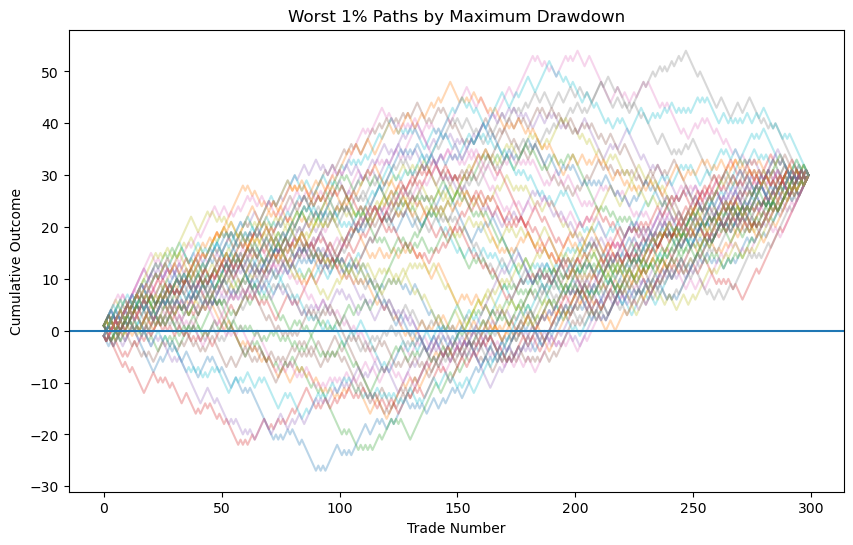

In [107]:
top_pct = 1
cutoff = int(n_path * top_pct / 100)

plt.figure(figsize = (10,6))

for path in sorted_paths[:cutoff]:
    plt.plot(path, alpha = 0.3)

plt.axhline(0)
plt.title(f"Worst {top_pct}% Paths by Maximum Drawdown")
plt.xlabel("Trade Number")
plt.ylabel("Cumulative Outcome")
plt.show()

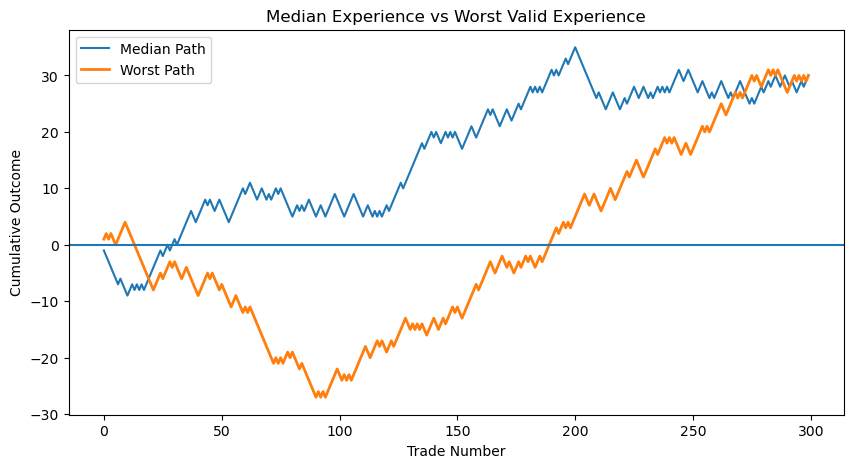

In [108]:
median_path = sorted_paths[n_path // 2]
worst_path = sorted_paths[0]

plt.figure(figsize=(10, 5))
plt.plot(median_path, label="Median Path")
plt.plot(worst_path, label="Worst Path", linewidth=2)
plt.axhline(0)
plt.legend()
plt.title("Median Experience vs Worst Valid Experience")
plt.xlabel("Trade Number")
plt.ylabel("Cumulative Outcome")
plt.show()


# Observations

- Worst-case paths are not pathological
- They occur naturally and repeatedly
- They are part of the same distribution as smoother paths

#### Key insight
>The mean is a statistical property.    
>The path is the lived experience.

#### Reframe
- Planning around the average path underestimates emotional strain
- Extreme discomfort does not imply failure
- Adverse realizations are not warnings — they are possibilities

This module does not ask whether these paths are likely.    
It asks whether they are survivable.